### 1. Nearest Neighbours Regression and an inverted U shape

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

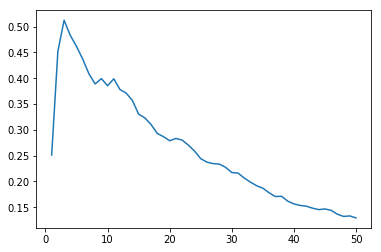

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

K_max = 50
results = np.empty(K_max)

for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(np.arange(K_max)+1, results)

In [9]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        R^2 of self.predict(X) wrt. y.



## 2. Using cross-validation to get an inverted Ushaped curve

In [10]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=1)
cross_val_score(knn, X_train, y_train)

array([0.1985968 , 0.19609297, 0.54525581])

In [11]:
from sklearn.utils import shuffle
X, y = shuffle(boston.data, boston.target, random_state=0)
print(cross_val_score(knn, X, y))

[0.30715435 0.36369852 0.51817514]


In [12]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2513311025465419

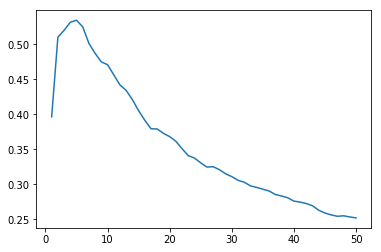

In [13]:
K_max = 50
results = np.empty(K_max)

for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, y))

plt.plot(np.arange(K_max)+1, results)

## Exercise 1
-Explain the role of the `np.mean` function above-

== Answer ==  
`cross_val_score` gives us back a list of resulting accuracies from its evaluations.  
Hence, we need to take a mean of the values in the list.

## Exercise 2
-Try different values of K_max in In[3] and In[8]. What is the
optimal value of the number K of nearest neighbours? Compare the behaviour
of the two inverted U-shaped curves for large values of K.-

== Answer ==  
As you can see in the pictures below, if we increase `K_max`, it only results almost same as the case where we set 50 to `K_max` and just indicates strong bearish trend of accuracy for training.
On the other hand, if we set smaller value to `K_max`, we can observe the exact appropriate value for K, which is `5` in this case.

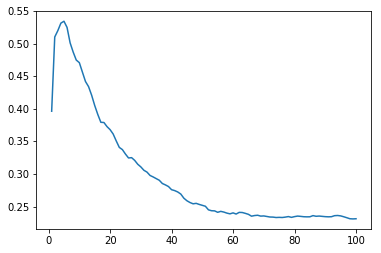

In [14]:
K_max = 100
results = np.empty(K_max)

for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, y))

plt.plot(np.arange(K_max)+1, results)

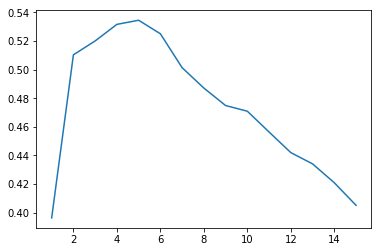

In [15]:
K_max = 15
results = np.empty(K_max)

for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, y))

plt.plot(np.arange(K_max)+1, results)

## 3 Learning curves

C:\Users\kosak\Anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


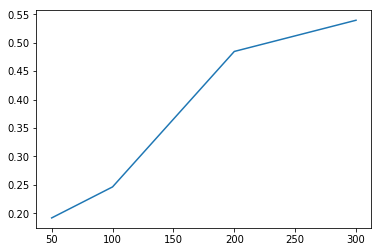

In [16]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes = np.array([50,100,200,300])

results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, train_size=train_sizes[k], random_state=0)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)

## Exercise 3
-Try other arrays of train_sizes in In[9]. Write one sentence summarizing what you see.-

== Answer ==  
Although the graph indicates the strong bullish trend of learning curve, at the point where `train_size`, this also means that we only have `506-500=6` test samples. So I am unable to ensure that this is reliable.

C:\Users\kosak\Anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


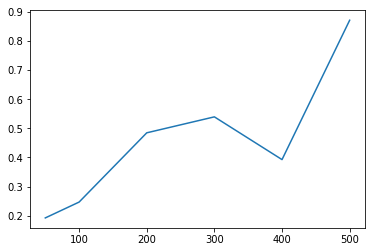

In [17]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes = np.array([50,100,200,300, 400, 500])

results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, train_size=train_sizes[k], random_state=0)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)

## Exercise 4
-Get rid of the FutureWarning in In[9]-

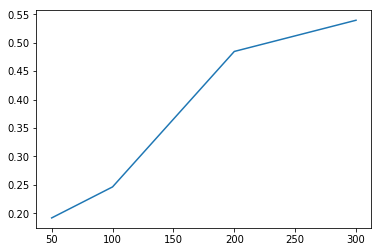

In [18]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes = np.array([50,100,200,300])

results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, train_size=train_sizes[k], test_size=(X.shape[0]-train_sizes[k]), random_state=0)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)

### 6. Plot a learning curve for the iris dataset.

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()

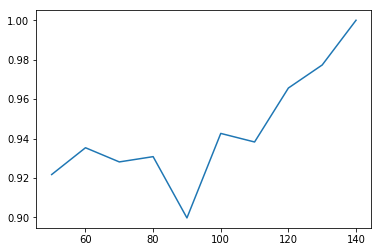

In [30]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes = np.array([50,60,70,80,90,100,110,120,130,140])

results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=train_sizes[k], test_size=None, random_state=0)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)